In [1]:
library(Seurat)
library(patchwork)
library(dplyr)
library(Matrix)
library(biomaRt)
library(ggplot2)
library(tidyr)
library(tidyverse)
library(pillar)
library(pals)

Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'tidyr'


The following objects are masked from 'package:Matrix':

    expand, pack, unpack


Warning message:
"'timedatectl' indicates the non-existent timezone name 'n/a'"
Warning message:
"Your system is mis-configured: '/etc/localtime' is not a symlink"
Warning message:
"It is strongly recommended to set envionment variable TZ to 'Europe/Brussels' (or equivalent)"
Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

-- Attaching packages ----------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts -------------------------------------------------------------- tidyverse_conf

In [7]:
setwd('/lustre1/project/stg_00041/')

In [8]:
#load seurat object with Petropoulos and Zhou data sets.
ai_object <- load("VP_MPZ_nonintegration_TSNE_umapintegration_DL_20210705.RData")

In [9]:
#Ai called this object: VP_MPZ_Seu_norm

head(VP_MPZ_Seu_norm)

Warning message:
"The following arguments are not used: drop"


An object of class Seurat 
6 features across 9193 samples within 1 assay 
Active assay: RNA (6 features, 0 variable features)
 2 dimensional reductions calculated: tsne, umap

In [10]:
head(VP_MPZ_Seu_norm@meta.data)

orig.ident.x                nCount_RNA nFeature_RNA
D10_IVC4_E1_B1_10 VP_Messmer_Petropoulos_Zhou  788590    10072       
D10_IVC4_E1_B1_11 VP_Messmer_Petropoulos_Zhou   46029     3923       
D10_IVC4_E1_B1_12 VP_Messmer_Petropoulos_Zhou  146063     7508       
D10_IVC4_E1_B1_13 VP_Messmer_Petropoulos_Zhou 1262641    10042       
D10_IVC4_E1_B1_14 VP_Messmer_Petropoulos_Zhou   24702     3347       
D10_IVC4_E1_B1_15 VP_Messmer_Petropoulos_Zhou 2358380    12107       
                  percent.mt percent.ERCC Sample            orig.ident.y
D10_IVC4_E1_B1_10 0          0            D10_IVC4_E1_B1_10 IVC4        
D10_IVC4_E1_B1_11 0          0            D10_IVC4_E1_B1_11 IVC4        
D10_IVC4_E1_B1_12 0          0            D10_IVC4_E1_B1_12 IVC4        
D10_IVC4_E1_B1_13 0          0            D10_IVC4_E1_B1_13 IVC4        
D10_IVC4_E1_B1_14 0          0            D10_IVC4_E1_B1_14 IVC4        
D10_IVC4_E1_B1_15 0          0            D10_IVC4_E1_B1_15 IVC4        
                  Experiment combine_state final_lineage Cell.type        
D10_IVC4_E1_B1_10 Zhou       E1            TE            post_implantation
D10_IVC4_E1_B1_11 Zhou       E1            TE            post_implantation
D10_IVC4_E1_B1_12 Zhou       E1            TE            post_implantation
D10_IVC4_E1_B1_13 Zhou       E1            TE            post_implantation
D10_IVC4_E1_B1_14 Zhou       E1            TE            post_implantation
D10_IVC4_E1_B1_15 Zhou       E1            TE            post_implantation
                  finalClusters Lineage   RNA_snn_res.0.1 seurat_clusters
D10_IVC4_E1_B1_10 TB.medium2    TE _ Zhou 0               0              
D10_IVC4_E1_B1_11 NA            TE _ Zhou 1               1              
D10_IVC4_E1_B1_12 TB.late       TE _ Zhou 0               0              
D10_IVC4_E1_B1_13 Pre.ST        TE _ Zhou 1               1              
D10_IVC4_E1_B1_14 NA            TE _ Zhou 1               1              
D10_IVC4_E1_B1_15 TB.late       TE _ Zhou 1               1

In [12]:
Pet_Zhou <- subset(x = VP_MPZ_Seu_norm, subset = (Experiment == "Zhou" | Experiment == "Pet"))

In [13]:
Pet_Zhou

An object of class Seurat 
73869 features across 7421 samples within 1 assay 
Active assay: RNA (73869 features, 2000 variable features)
 3 dimensional reductions calculated: pca, tsne, umap

In [14]:
head(Pet_Zhou@meta.data)

orig.ident.x                nCount_RNA nFeature_RNA
D10_IVC4_E1_B1_10 VP_Messmer_Petropoulos_Zhou  788590    10072       
D10_IVC4_E1_B1_11 VP_Messmer_Petropoulos_Zhou   46029     3923       
D10_IVC4_E1_B1_12 VP_Messmer_Petropoulos_Zhou  146063     7508       
D10_IVC4_E1_B1_13 VP_Messmer_Petropoulos_Zhou 1262641    10042       
D10_IVC4_E1_B1_14 VP_Messmer_Petropoulos_Zhou   24702     3347       
D10_IVC4_E1_B1_15 VP_Messmer_Petropoulos_Zhou 2358380    12107       
                  percent.mt percent.ERCC Sample            orig.ident.y
D10_IVC4_E1_B1_10 0          0            D10_IVC4_E1_B1_10 IVC4        
D10_IVC4_E1_B1_11 0          0            D10_IVC4_E1_B1_11 IVC4        
D10_IVC4_E1_B1_12 0          0            D10_IVC4_E1_B1_12 IVC4        
D10_IVC4_E1_B1_13 0          0            D10_IVC4_E1_B1_13 IVC4        
D10_IVC4_E1_B1_14 0          0            D10_IVC4_E1_B1_14 IVC4        
D10_IVC4_E1_B1_15 0          0            D10_IVC4_E1_B1_15 IVC4        
                  Experiment combine_state final_lineage Cell.type        
D10_IVC4_E1_B1_10 Zhou       E1            TE            post_implantation
D10_IVC4_E1_B1_11 Zhou       E1            TE            post_implantation
D10_IVC4_E1_B1_12 Zhou       E1            TE            post_implantation
D10_IVC4_E1_B1_13 Zhou       E1            TE            post_implantation
D10_IVC4_E1_B1_14 Zhou       E1            TE            post_implantation
D10_IVC4_E1_B1_15 Zhou       E1            TE            post_implantation
                  finalClusters Lineage   RNA_snn_res.0.1 seurat_clusters
D10_IVC4_E1_B1_10 TB.medium2    TE _ Zhou 0               0              
D10_IVC4_E1_B1_11 NA            TE _ Zhou 1               1              
D10_IVC4_E1_B1_12 TB.late       TE _ Zhou 0               0              
D10_IVC4_E1_B1_13 Pre.ST        TE _ Zhou 1               1              
D10_IVC4_E1_B1_14 NA            TE _ Zhou 1               1              
D10_IVC4_E1_B1_15 TB.late       TE _ Zhou 1               1

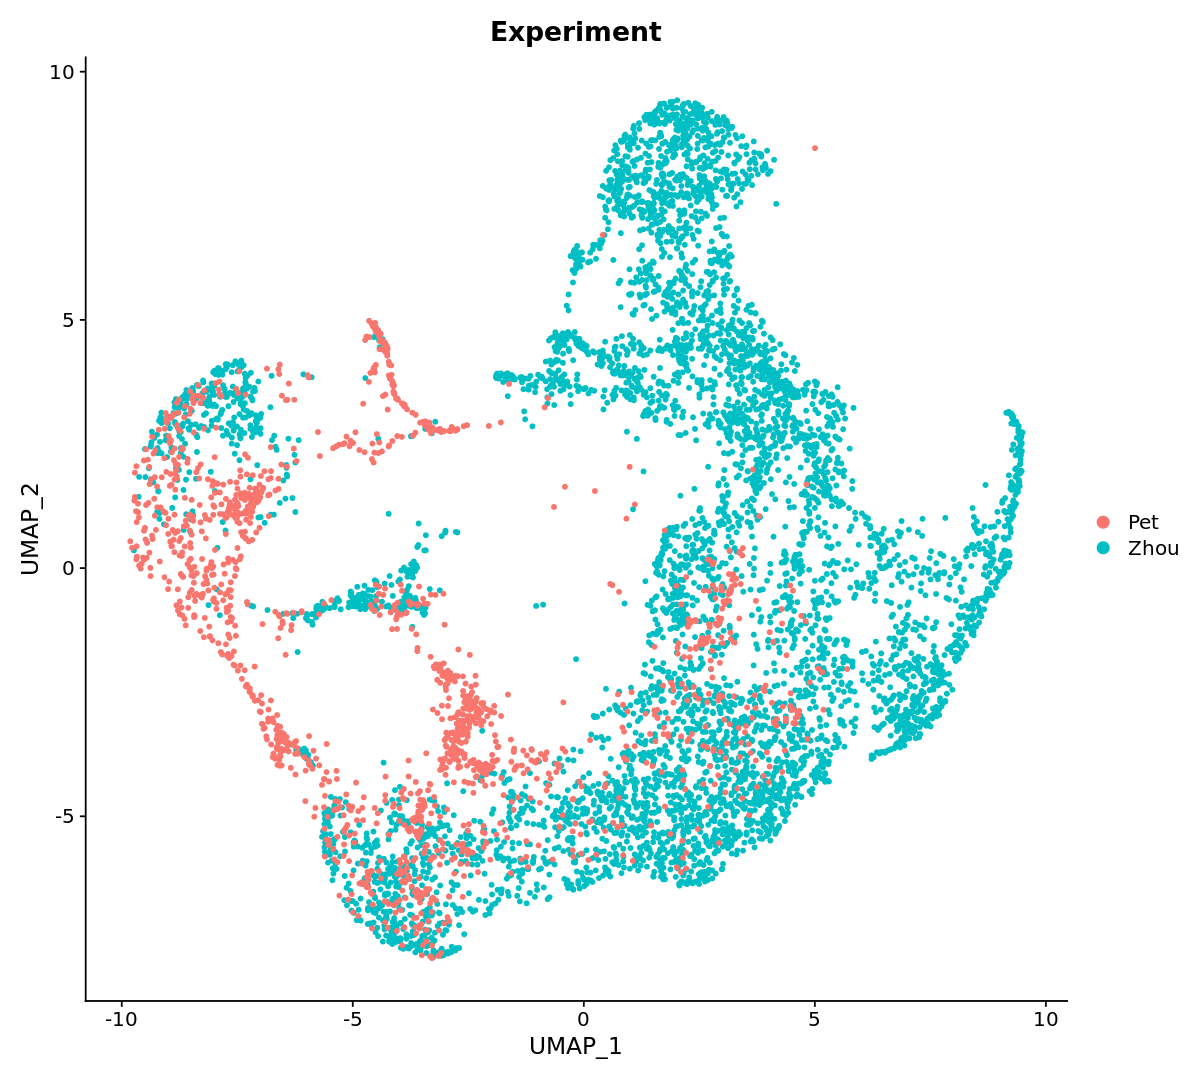

In [15]:
options(repr.plot.width = 10, repr.plot.height = 9)
DimPlot(Pet_Zhou, reduction = "umap", pt.size = 1, group.by = "Experiment")

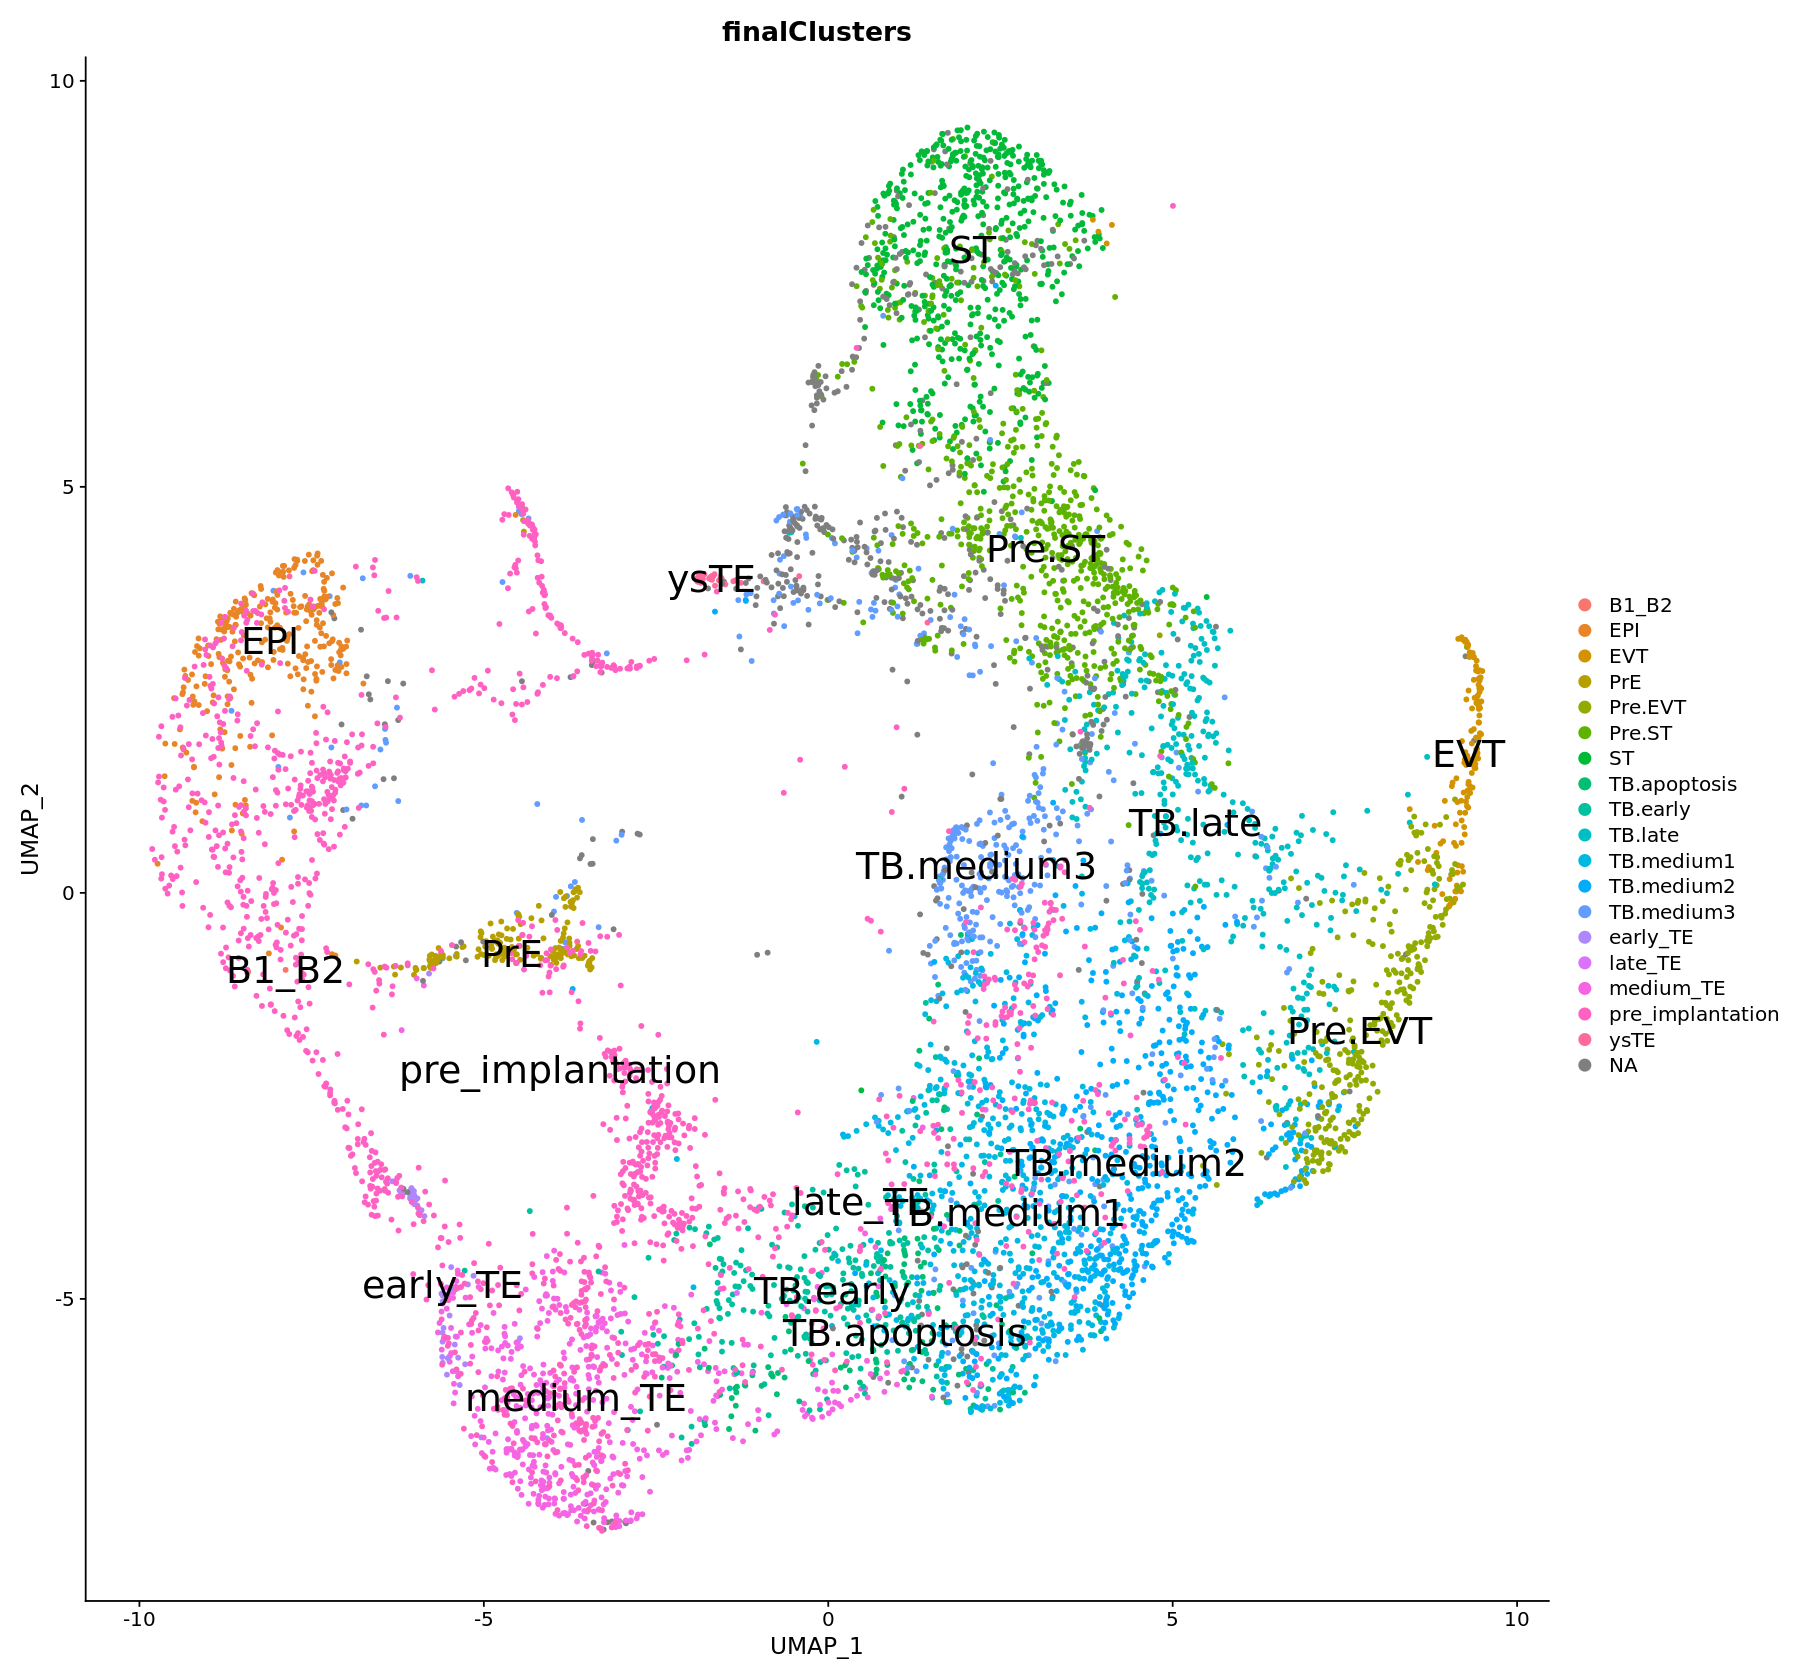

In [16]:
options(repr.plot.width = 15, repr.plot.height = 14)
DimPlot(Pet_Zhou, reduction = "umap", pt.size = 1, group.by = "finalClusters",
       label = TRUE,
        label.size = 8)

In [17]:
#load seurat object with Naive and d4 trophoblast +/- PRC2i
object_Irene <- readRDS("/lustre1/project/stg_00041/Irene/10X_NAIVE_TSC_2021/nonaggr_noMEFs_mouse_human_analysis/seurat_object_norm.rds")

In [18]:
head(object_Irene@meta.data)

orig.ident               nCount_RNA nFeature_RNA
TSC_AAACCCACACTCCGGA.1 naive_TSC_PRC2i_Irene_VP  79984      8416       
TSC_AAACGAAGTAAGGCCA.1 naive_TSC_PRC2i_Irene_VP 187905     10316       
TSC_AAACGCTTCTACTGAG.1 naive_TSC_PRC2i_Irene_VP 103178      8633       
TSC_AAAGGGCCATGGAATA.1 naive_TSC_PRC2i_Irene_VP  70210      8112       
TSC_AAAGGTAAGATGCTGG.1 naive_TSC_PRC2i_Irene_VP  67006      7910       
TSC_AAAGTCCAGAAACACT.1 naive_TSC_PRC2i_Irene_VP  56056      7707       
                       percent.MT sample RNA_snn_res.0.2 seurat_clusters
TSC_AAACCCACACTCCGGA.1 12.40998   TSC    1               1              
TSC_AAACGAAGTAAGGCCA.1 13.33493   TSC    1               1              
TSC_AAACGCTTCTACTGAG.1 12.52302   TSC    2               2              
TSC_AAAGGGCCATGGAATA.1 18.62555   TSC    1               1              
TSC_AAAGGTAAGATGCTGG.1 15.51354   TSC    1               1              
TSC_AAAGTCCAGAAACACT.1 16.82068   TSC    1               1

In [19]:
names(object_Irene@meta.data)[5] <- "finalClusters"

In [20]:
head(object_Irene@meta.data)

orig.ident               nCount_RNA nFeature_RNA
TSC_AAACCCACACTCCGGA.1 naive_TSC_PRC2i_Irene_VP  79984      8416       
TSC_AAACGAAGTAAGGCCA.1 naive_TSC_PRC2i_Irene_VP 187905     10316       
TSC_AAACGCTTCTACTGAG.1 naive_TSC_PRC2i_Irene_VP 103178      8633       
TSC_AAAGGGCCATGGAATA.1 naive_TSC_PRC2i_Irene_VP  70210      8112       
TSC_AAAGGTAAGATGCTGG.1 naive_TSC_PRC2i_Irene_VP  67006      7910       
TSC_AAAGTCCAGAAACACT.1 naive_TSC_PRC2i_Irene_VP  56056      7707       
                       percent.MT finalClusters RNA_snn_res.0.2 seurat_clusters
TSC_AAACCCACACTCCGGA.1 12.40998   TSC           1               1              
TSC_AAACGAAGTAAGGCCA.1 13.33493   TSC           1               1              
TSC_AAACGCTTCTACTGAG.1 12.52302   TSC           2               2              
TSC_AAAGGGCCATGGAATA.1 18.62555   TSC           1               1              
TSC_AAAGGTAAGATGCTGG.1 15.51354   TSC           1               1              
TSC_AAAGTCCAGAAACACT.1 16.82068   TSC           1               1

In [21]:
names(object_Irene@meta.data)[1] <- "Experiment"

In [22]:
head(object_Irene@meta.data)

Experiment               nCount_RNA nFeature_RNA
TSC_AAACCCACACTCCGGA.1 naive_TSC_PRC2i_Irene_VP  79984      8416       
TSC_AAACGAAGTAAGGCCA.1 naive_TSC_PRC2i_Irene_VP 187905     10316       
TSC_AAACGCTTCTACTGAG.1 naive_TSC_PRC2i_Irene_VP 103178      8633       
TSC_AAAGGGCCATGGAATA.1 naive_TSC_PRC2i_Irene_VP  70210      8112       
TSC_AAAGGTAAGATGCTGG.1 naive_TSC_PRC2i_Irene_VP  67006      7910       
TSC_AAAGTCCAGAAACACT.1 naive_TSC_PRC2i_Irene_VP  56056      7707       
                       percent.MT finalClusters RNA_snn_res.0.2 seurat_clusters
TSC_AAACCCACACTCCGGA.1 12.40998   TSC           1               1              
TSC_AAACGAAGTAAGGCCA.1 13.33493   TSC           1               1              
TSC_AAACGCTTCTACTGAG.1 12.52302   TSC           2               2              
TSC_AAAGGGCCATGGAATA.1 18.62555   TSC           1               1              
TSC_AAAGGTAAGATGCTGG.1 15.51354   TSC           1               1              
TSC_AAAGTCCAGAAACACT.1 16.82068   TSC           1               1

In [24]:
#keep only d4 trophoblast cells +/- PRC2i includin C1 and C2 clusters

object_Irene_tsc <- subset(x = object_Irene, subset = (finalClusters == "TSC" | finalClusters == "TSCPRC2i"))

In [25]:
unique(object_Irene_tsc@meta.data$finalClusters)

[1] "TSC"      "TSCPRC2i"

Merge both seurat objects and normalize them:

In [26]:
Pet_Zhou_IT <- merge(x = Pet_Zhou, y = object_Irene_tsc)

In [27]:
# split the dataset into a list of several seurat objects

Pet_Zhou_IT.list.allgenes <- SplitObject(Pet_Zhou_IT, split.by = "Experiment")

Perform integration: canonical correlation analysis (‘CCA’) 

Instead of selecting some genes, take all genes in common in the merged object:

In [28]:
# Get a vector with all genes in the merged object, so we can make the integration with all genes

allfeatures <- rownames(x = Pet_Zhou_IT)

In [29]:
Pet_Zhou_IT.anchors.allgenes <- FindIntegrationAnchors(
  object.list = Pet_Zhou_IT.list.allgenes,
  anchor.features = allfeatures)

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 5576 anchors

Filtering anchors

	Retained 2538 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6248 anchors

Filtering anchors

	Retained 1901 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 4253 anchors

Filtering anchors

	Retained 1609 anchors



In [30]:
# this command creates an 'integrated' data assay

Pet_Zhou_IT_allgenes <- IntegrateData(anchorset = Pet_Zhou_IT.anchors.allgenes)

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 3 into 1 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [31]:
# specify that we will perform downstream analysis on the corrected data note that the
# original unmodified data still resides in the 'RNA' assay. we could change this to "RNA" (instead of integrated),
#if you want to look at gene expression of individual genes better to set it up for RNA

DefaultAssay(Pet_Zhou_IT_allgenes) <- "integrated"

Run the standard workflow for visualization and clustering

In [32]:
Pet_Zhou_IT_allgenes <- ScaleData(Pet_Zhou_IT_allgenes, verbose = FALSE)

In [33]:
Pet_Zhou_IT_allgenes <- RunPCA(Pet_Zhou_IT_allgenes, npcs = 30, verbose = FALSE)

In [34]:
Pet_Zhou_IT_allgenes <- RunUMAP(Pet_Zhou_IT_allgenes, reduction = "pca", dims = 1:30)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
14:23:55 UMAP embedding parameters a = 0.9922 b = 1.112

14:23:55 Read 8809 rows and found 30 numeric columns

14:23:55 Using Annoy for neighbor search, n_neighbors = 30

14:23:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:23:56 Writing NN index file to temp file /tmp/RtmpdXPjJB/file70687957f335

14:23:56 Searching Annoy index using 1 thread, search_k = 3000

14:23:58 Annoy recall = 100%

14:24:00 Commencing smooth kNN distance calibration using 1 thread

14:24:01 Initializing fro

In [35]:
Pet_Zhou_IT_allgenes <- FindNeighbors(Pet_Zhou_IT_allgenes, reduction = "pca", dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [36]:
head(Pet_Zhou_IT_allgenes@meta.data)

orig.ident.x                nCount_RNA nFeature_RNA
D10_IVC4_E1_B1_10 VP_Messmer_Petropoulos_Zhou  788590    10072       
D10_IVC4_E1_B1_11 VP_Messmer_Petropoulos_Zhou   46029     3923       
D10_IVC4_E1_B1_12 VP_Messmer_Petropoulos_Zhou  146063     7508       
D10_IVC4_E1_B1_13 VP_Messmer_Petropoulos_Zhou 1262641    10042       
D10_IVC4_E1_B1_14 VP_Messmer_Petropoulos_Zhou   24702     3347       
D10_IVC4_E1_B1_15 VP_Messmer_Petropoulos_Zhou 2358380    12107       
                  percent.mt percent.ERCC Sample            orig.ident.y
D10_IVC4_E1_B1_10 0          0            D10_IVC4_E1_B1_10 IVC4        
D10_IVC4_E1_B1_11 0          0            D10_IVC4_E1_B1_11 IVC4        
D10_IVC4_E1_B1_12 0          0            D10_IVC4_E1_B1_12 IVC4        
D10_IVC4_E1_B1_13 0          0            D10_IVC4_E1_B1_13 IVC4        
D10_IVC4_E1_B1_14 0          0            D10_IVC4_E1_B1_14 IVC4        
D10_IVC4_E1_B1_15 0          0            D10_IVC4_E1_B1_15 IVC4        
                  Experiment combine_state final_lineage Cell.type        
D10_IVC4_E1_B1_10 Zhou       E1            TE            post_implantation
D10_IVC4_E1_B1_11 Zhou       E1            TE            post_implantation
D10_IVC4_E1_B1_12 Zhou       E1            TE            post_implantation
D10_IVC4_E1_B1_13 Zhou       E1            TE            post_implantation
D10_IVC4_E1_B1_14 Zhou       E1            TE            post_implantation
D10_IVC4_E1_B1_15 Zhou       E1            TE            post_implantation
                  finalClusters Lineage   RNA_snn_res.0.1 seurat_clusters
D10_IVC4_E1_B1_10 TB.medium2    TE _ Zhou 0               0              
D10_IVC4_E1_B1_11 NA            TE _ Zhou 1               1              
D10_IVC4_E1_B1_12 TB.late       TE _ Zhou 0               0              
D10_IVC4_E1_B1_13 Pre.ST        TE _ Zhou 1               1              
D10_IVC4_E1_B1_14 NA            TE _ Zhou 1               1              
D10_IVC4_E1_B1_15 TB.late       TE _ Zhou 1               1              
                  percent.MT RNA_snn_res.0.2
D10_IVC4_E1_B1_10 NA         NA             
D10_IVC4_E1_B1_11 NA         NA             
D10_IVC4_E1_B1_12 NA         NA             
D10_IVC4_E1_B1_13 NA         NA             
D10_IVC4_E1_B1_14 NA         NA             
D10_IVC4_E1_B1_15 NA         NA

Save the new integrated seurat object:

In [41]:
saveRDS(Pet_Zhou_IT_allgenes, file = "/lustre1/project/stg_00041/Irene/10X_NAIVE_TSC_2021/Integration_plots/Pet_Zhou_IT_allgenes_norm.rds")

In [2]:
####################################################################################################

Pet_Zhou_IT_allgenes <- readRDS(file = "/lustre1/project/stg_00041/Irene/10X_NAIVE_TSC_2021/nonaggr_noMEFs_mouse_human_analysis/Pet_Zhou_IT_allgenes_norm_new_anno.rds")

################################################################################################################

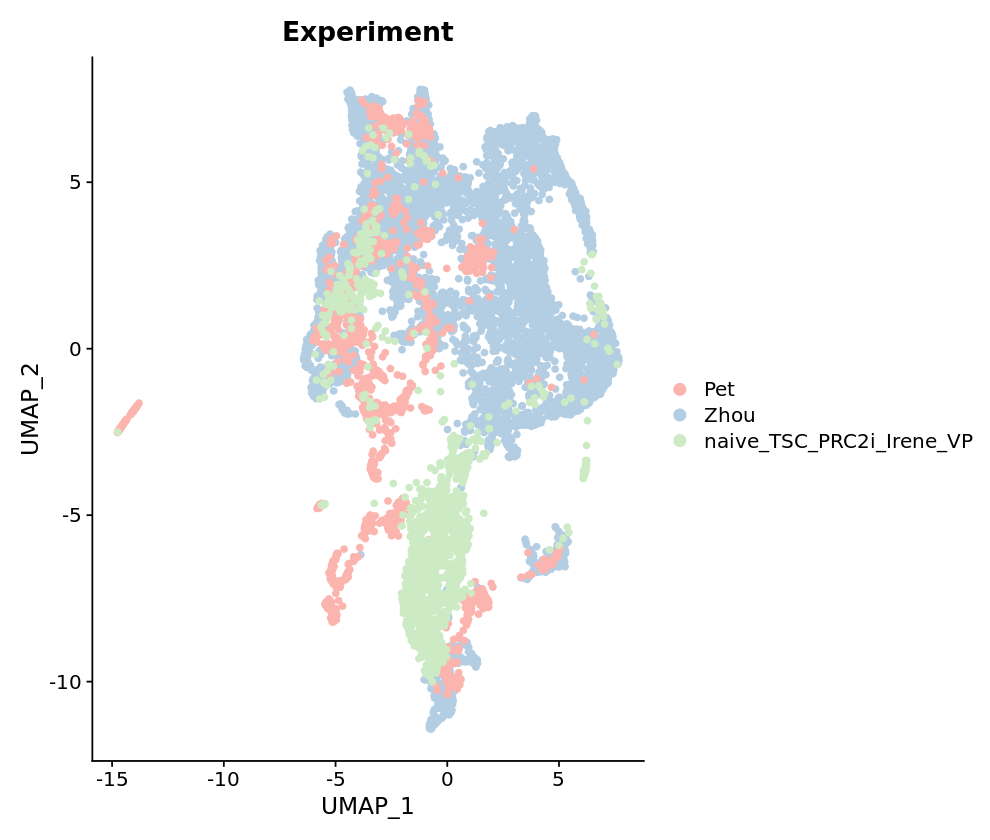

In [4]:
options(repr.plot.width = 8.25, repr.plot.height = 7)
DimPlot(Pet_Zhou_IT_allgenes, reduction = "umap", pt.size = 1.5, group.by = "Experiment",
       label = FALSE,
        label.size = 6,  label.color = "black")+
        scale_color_brewer(palette = "Pastel1")

In [6]:
# Remove few cells that have been annotated with Naive although they come from d4 trophoblast samples (these are very few cells)
Pet_Zhou_IT_allgenes@meta.data <- subset(Pet_Zhou_IT_allgenes@meta.data, finalClusters != "Naive")

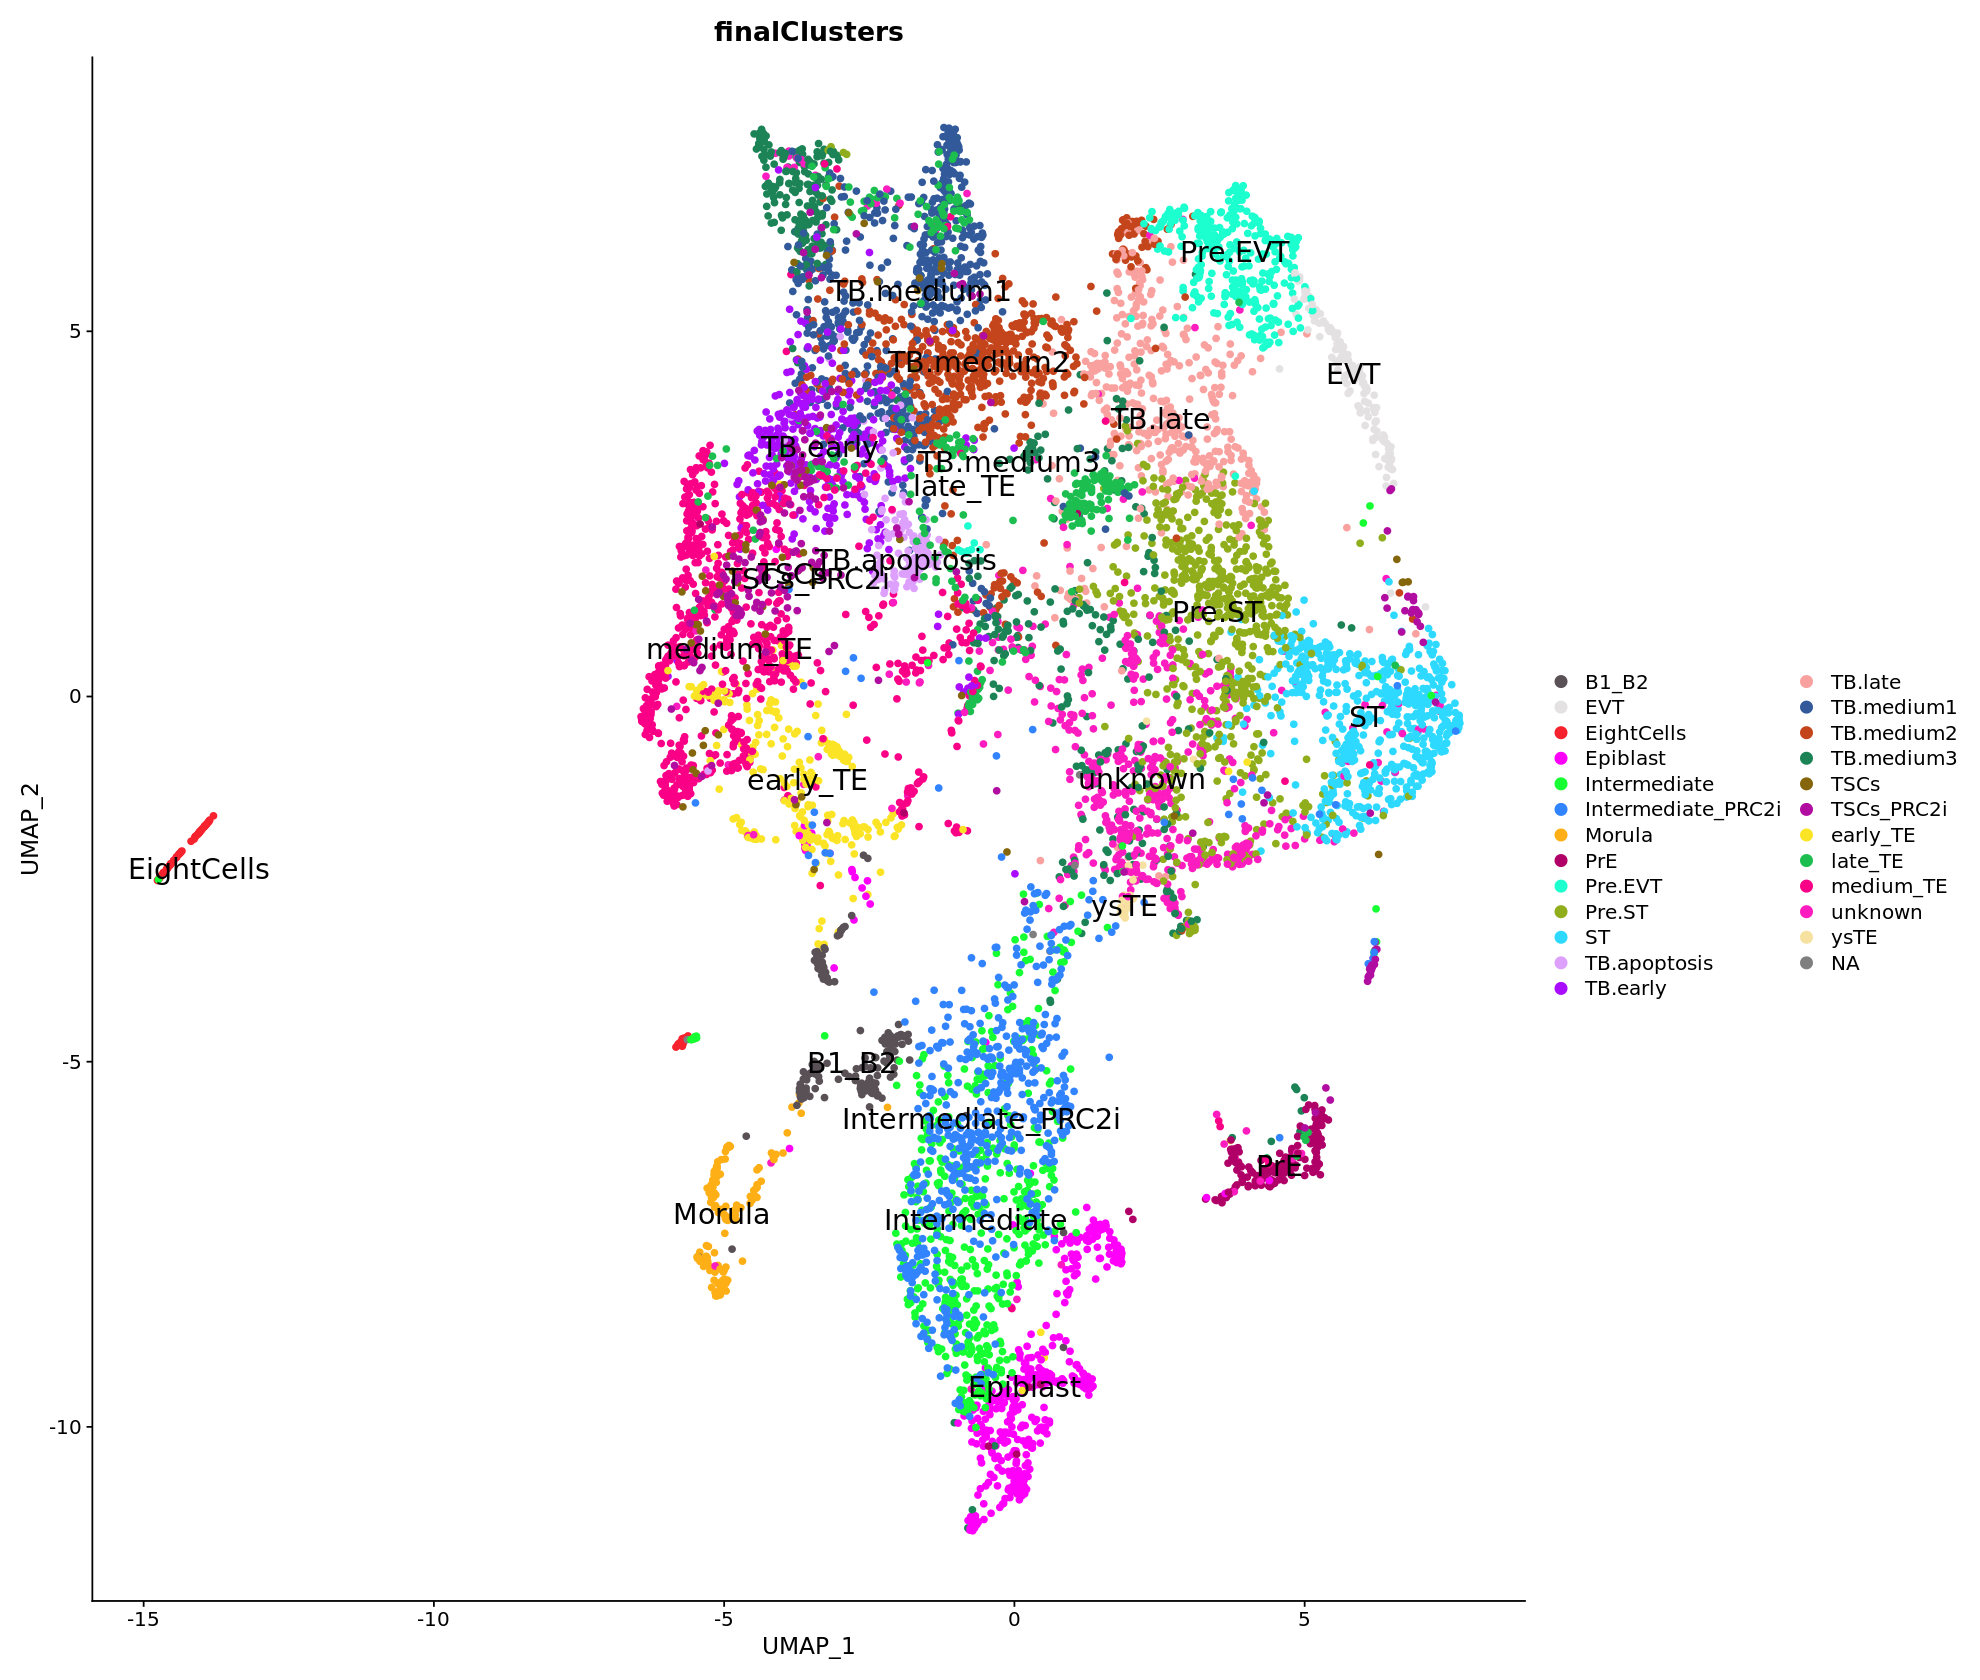

In [9]:
options(repr.plot.width = 16.5, repr.plot.height = 14)
DimPlot(Pet_Zhou_IT_allgenes, reduction = "umap", pt.size = 1.5, group.by = "finalClusters",
       label = TRUE,
        label.size = 6,  label.color = "black",
       cols = "polychrome")

In [56]:
pdf(file="/lustre1/project/stg_00041/Irene/10X_NAIVE_TSC_2021/Integration_plots/IT_PZ_lineageFINAL.pdf", height = 14, width = 16.5)
DimPlot(Pet_Zhou_IT_allgenes, reduction = "umap", pt.size = 0.5, group.by = "finalClusters",
       label = TRUE,
        label.size = 6,  label.color = "black",
       cols = "polychrome")
dev.off()

png 
  2

Make a new column with merged nomenclature for Fig6a (main umap)

In [15]:
unique(Pet_Zhou_IT_allgenes@meta.data$finalClusters)

[1] "TB.medium2"         "unknown"            "TB.late"           
 [4] "Pre.ST"             "TB.medium3"         "PrE"               
 [7] "Pre.EVT"            "Epiblast"           "ST"                
[10] "EVT"                "ysTE"               "early_TE"          
[13] "medium_TE"          "TB.medium1"         "TB.early"          
[16] "B1_B2"              "TB.apoptosis"       "late_TE"           
[19] "EightCells"         "Morula"             "Intermediate"      
[22] "TSCs"               "TSCs_PRC2i"         "Intermediate_PRC2i"

In [16]:
Pet_Zhou_IT_allgenes@meta.data$finalClustersMerged <- Pet_Zhou_IT_allgenes@meta.data$finalClusters

In [17]:
Pet_Zhou_IT_allgenes@meta.data <- Pet_Zhou_IT_allgenes@meta.data %>%                               # Replacing values
  mutate(finalClustersMerged = replace(finalClustersMerged, finalClustersMerged == "TB.medium2", "Embryo Trophoblast"))

In [18]:
Pet_Zhou_IT_allgenes@meta.data <- Pet_Zhou_IT_allgenes@meta.data %>%                               # Replacing values
  mutate(finalClustersMerged = replace(finalClustersMerged, finalClustersMerged == "TB.late", "Embryo Trophoblast"))

In [19]:
Pet_Zhou_IT_allgenes@meta.data <- Pet_Zhou_IT_allgenes@meta.data %>%                               # Replacing values
  mutate(finalClustersMerged = replace(finalClustersMerged, finalClustersMerged == "Pre.ST", "Embryo ST"))

In [20]:
Pet_Zhou_IT_allgenes@meta.data <- Pet_Zhou_IT_allgenes@meta.data %>%                               # Replacing values
  mutate(finalClustersMerged = replace(finalClustersMerged, finalClustersMerged == "ST", "Embryo ST"))

In [21]:
Pet_Zhou_IT_allgenes@meta.data <- Pet_Zhou_IT_allgenes@meta.data %>%                               # Replacing values
  mutate(finalClustersMerged = replace(finalClustersMerged, finalClustersMerged == "TB.medium3", "Embryo Trophoblast"))

In [22]:
Pet_Zhou_IT_allgenes@meta.data <- Pet_Zhou_IT_allgenes@meta.data %>%                               # Replacing values
  mutate(finalClustersMerged = replace(finalClustersMerged, finalClustersMerged == "Pre.EVT", "Embryo EVT"))

In [23]:
Pet_Zhou_IT_allgenes@meta.data <- Pet_Zhou_IT_allgenes@meta.data %>%                               # Replacing values
  mutate(finalClustersMerged = replace(finalClustersMerged, finalClustersMerged == "EVT", "Embryo EVT"))

In [24]:
Pet_Zhou_IT_allgenes@meta.data <- Pet_Zhou_IT_allgenes@meta.data %>%                               # Replacing values
  mutate(finalClustersMerged = replace(finalClustersMerged, finalClustersMerged == "early_TE", "Embryo TE"))

In [25]:
Pet_Zhou_IT_allgenes@meta.data <- Pet_Zhou_IT_allgenes@meta.data %>%                               # Replacing values
  mutate(finalClustersMerged = replace(finalClustersMerged, finalClustersMerged == "medium_TE", "Embryo TE"))

In [26]:
Pet_Zhou_IT_allgenes@meta.data <- Pet_Zhou_IT_allgenes@meta.data %>%                               # Replacing values
  mutate(finalClustersMerged = replace(finalClustersMerged, finalClustersMerged == "TB.medium1", "Embryo Trophoblast"))

In [27]:
Pet_Zhou_IT_allgenes@meta.data <- Pet_Zhou_IT_allgenes@meta.data %>%                               # Replacing values
  mutate(finalClustersMerged = replace(finalClustersMerged, finalClustersMerged == "TB.early", "Embryo Trophoblast"))

In [28]:
Pet_Zhou_IT_allgenes@meta.data <- Pet_Zhou_IT_allgenes@meta.data %>%                               # Replacing values
  mutate(finalClustersMerged = replace(finalClustersMerged, finalClustersMerged == "TB.apoptosis", "Embryo Trophoblast"))

In [29]:
Pet_Zhou_IT_allgenes@meta.data <- Pet_Zhou_IT_allgenes@meta.data %>%                               # Replacing values
  mutate(finalClustersMerged = replace(finalClustersMerged, finalClustersMerged == "late_TE", "Embryo TE"))

In [30]:
Pet_Zhou_IT_allgenes@meta.data <- Pet_Zhou_IT_allgenes@meta.data %>%                               # Replacing values
  mutate(finalClustersMerged = replace(finalClustersMerged, finalClustersMerged == "Morula", "(Pre) Blastocyst"))

In [31]:
Pet_Zhou_IT_allgenes@meta.data <- Pet_Zhou_IT_allgenes@meta.data %>%                               # Replacing values
  mutate(finalClustersMerged = replace(finalClustersMerged, finalClustersMerged == "B1_B2", "(Pre) Blastocyst"))

In [32]:
unique(Pet_Zhou_IT_allgenes@meta.data$finalClustersMerged)

[1] "Embryo Trophoblast" "unknown"            "Embryo ST"         
 [4] "PrE"                "Embryo EVT"         "Epiblast"          
 [7] "ysTE"               "Embryo TE"          "(Pre) Blastocyst"  
[10] "EightCells"         "Intermediate"       "TSCs"              
[13] "TSCs_PRC2i"         "Intermediate_PRC2i"

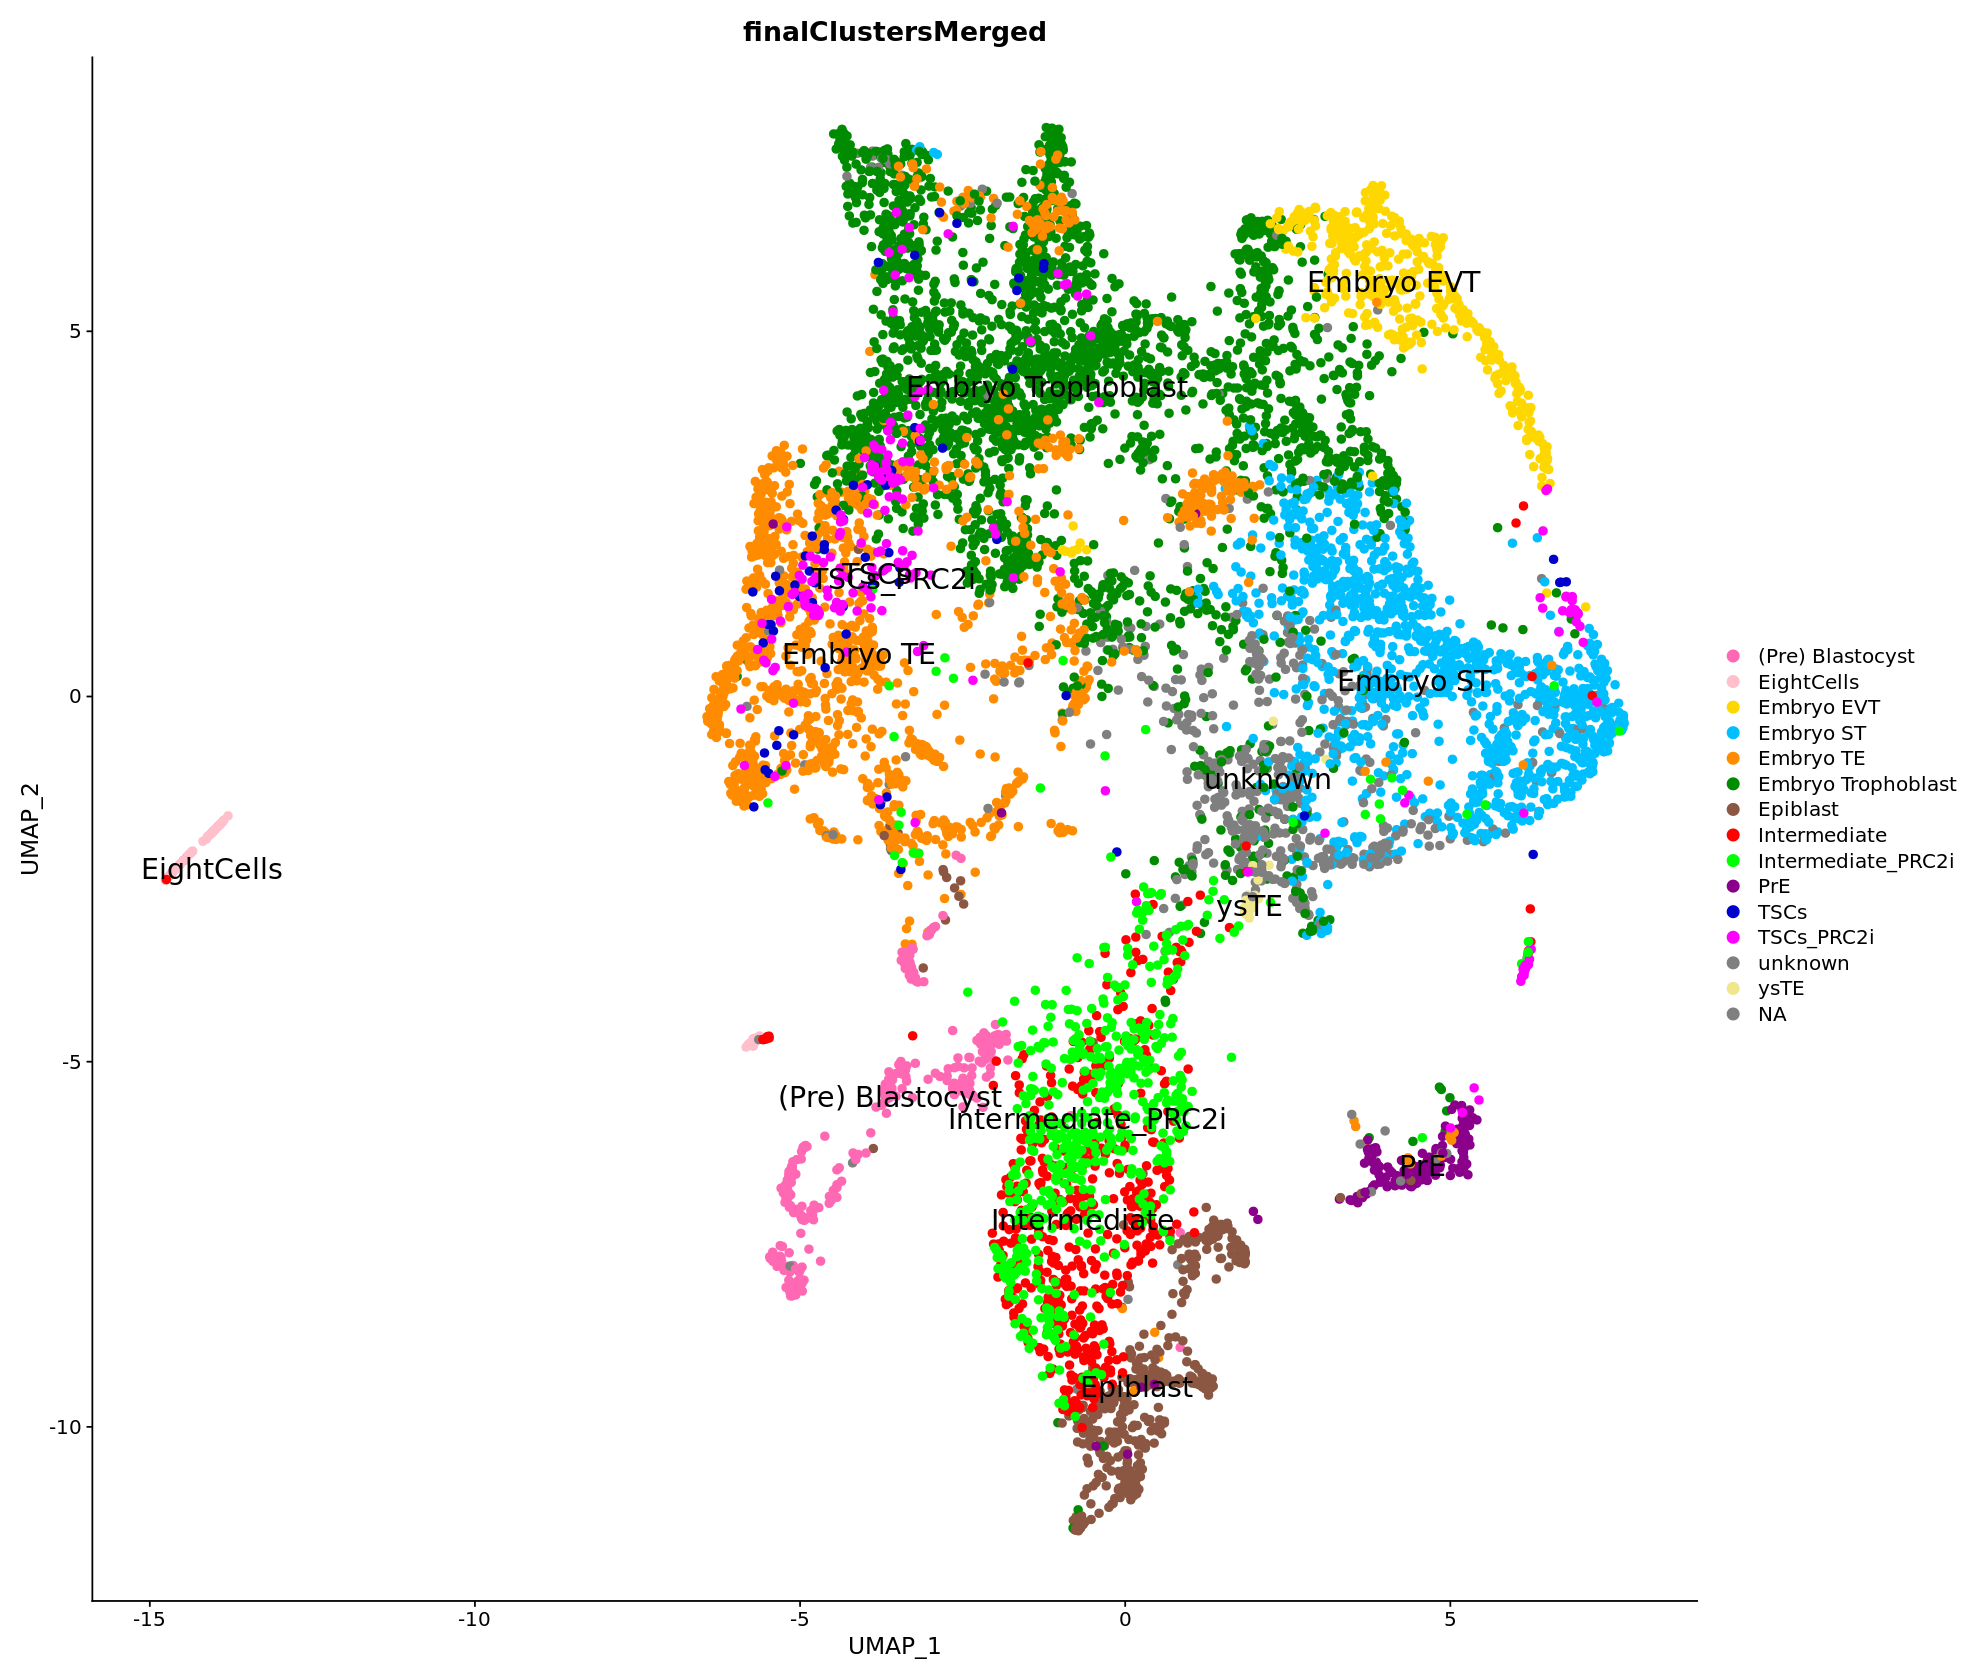

In [34]:
DimPlot(Pet_Zhou_IT_allgenes, reduction = "umap", pt.size = 2, group.by = "finalClustersMerged",
       label = TRUE,
        label.size = 6,  label.color = "black",
       cols = c("hotpink", #blastocyst
                "pink", #8cell
                "gold", #embryo evt
                "deepskyblue", #embryo st
                "darkorange", #emrbyo TE
                "green4",  # EMRBYO TROPHOBLAST
                "lightsalmon4", #LIGHTSALMON
                "red", #INTERMEDIATE
                "green", #INTERM PRC2I
                "magenta4", #PRENDO
               "blue3", #TSC rosybrown
               "magenta", #TSC PRC2i
               "grey50", # unknown khaki
               "khaki")) #ysTE

In [ ]:
pdf(file="/lustre1/project/stg_00041/Irene/10X_NAIVE_TSC_2021/Integration_plots/New_anno_integration_plots/MergedClusters.pdf", height = 14, width = 16.5)
options(repr.plot.width = 16.5, repr.plot.height = 14)
DimPlot(Pet_Zhou_IT_allgenes, reduction = "umap", pt.size = 2, group.by = "finalClustersMerged",
       label = TRUE,
        label.size = 6,  label.color = "black",
       cols = c("hotpink", #blastocyst
                "pink", #8cell
                "gold", #embryo evt
                "deepskyblue", #embryo st
                "darkorange", #emrbyo TE
                "green4",  # EMRBYO TROPHOBLAST
                "lightsalmon4", #LIGHTSALMON
                "red", #INTERMEDIATE
                "green", #INTERM PRC2I
                "magenta4", #PRENDO
               "blue3", #TSC rosybrown
               "magenta", #TSC PRC2i
               "grey50", # unknown khaki
               "khaki")) #ysTE
dev.off()

Show some UMAPs only coloring the cells of interest

In [126]:
TSCs <- WhichCells(Pet_Zhou_IT_allgenes, idents = "TSCs")

In [127]:
TSCs_PRC2i <- WhichCells(Pet_Zhou_IT_allgenes, idents = "TSCs_PRC2i")

In [128]:
Embryo_Trophoblast <- WhichCells(Pet_Zhou_IT_allgenes, idents = "Embryo Trophoblast")
Embryo.TE <- WhichCells(Pet_Zhou_IT_allgenes, idents = "Embryo TE")

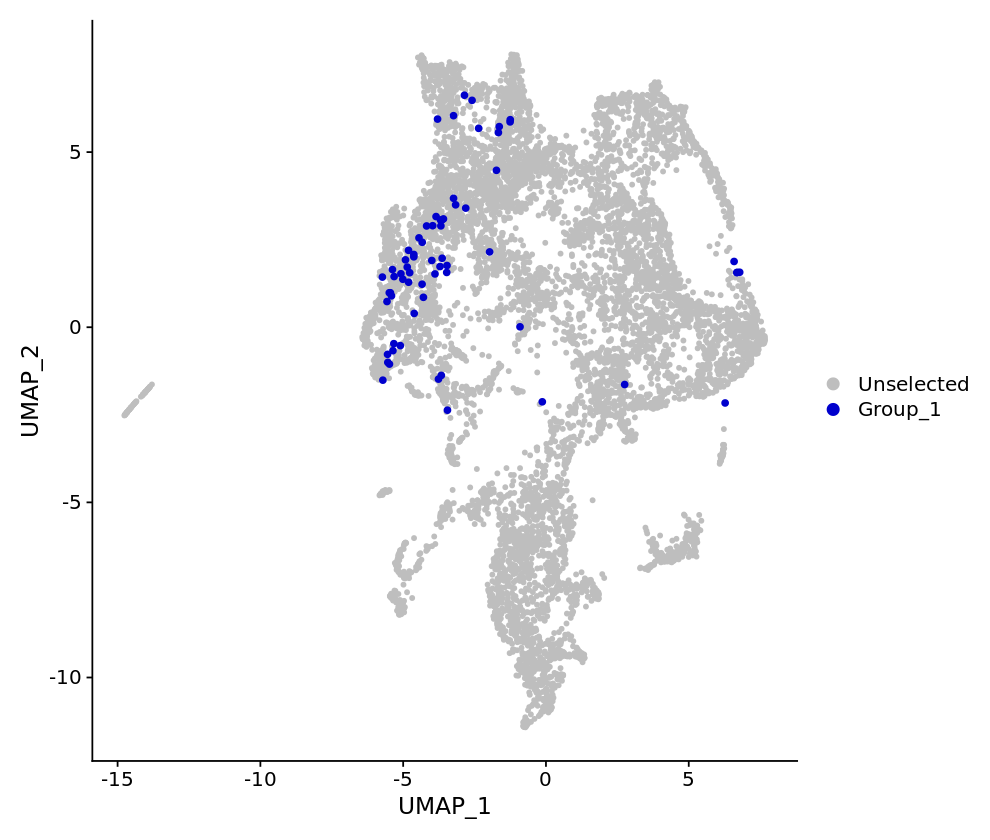

In [134]:
options(repr.plot.width = 8.25, repr.plot.height = 7)
DimPlot(object = Pet_Zhou_IT_allgenes, reduction = "umap", pt.size = 1, 
        #group.by = "finalClustersIT", 
        cells.highlight=TSCs, cols.highlight = "blue3", cols= "grey", sizes.highlight = 1.5)
       #label = FALSE,
        #label.size = 6,  label.color = "black")

In [159]:
pdf(file="/lustre1/project/stg_00041/Irene/10X_NAIVE_TSC_2021/Integration_plots/New_anno_integration_plots/TSC.pdf", height = 7, width = 8.25)
DimPlot(object = Pet_Zhou_IT_allgenes, reduction = "umap", pt.size = 1, 
        #group.by = "finalClustersIT", 
        cells.highlight=TSCs, cols.highlight = "blue3", cols= "grey", sizes.highlight = 1.5)
       #label = FALSE,
        #label.size = 6,  label.color = "black")
dev.off()

png 
  2

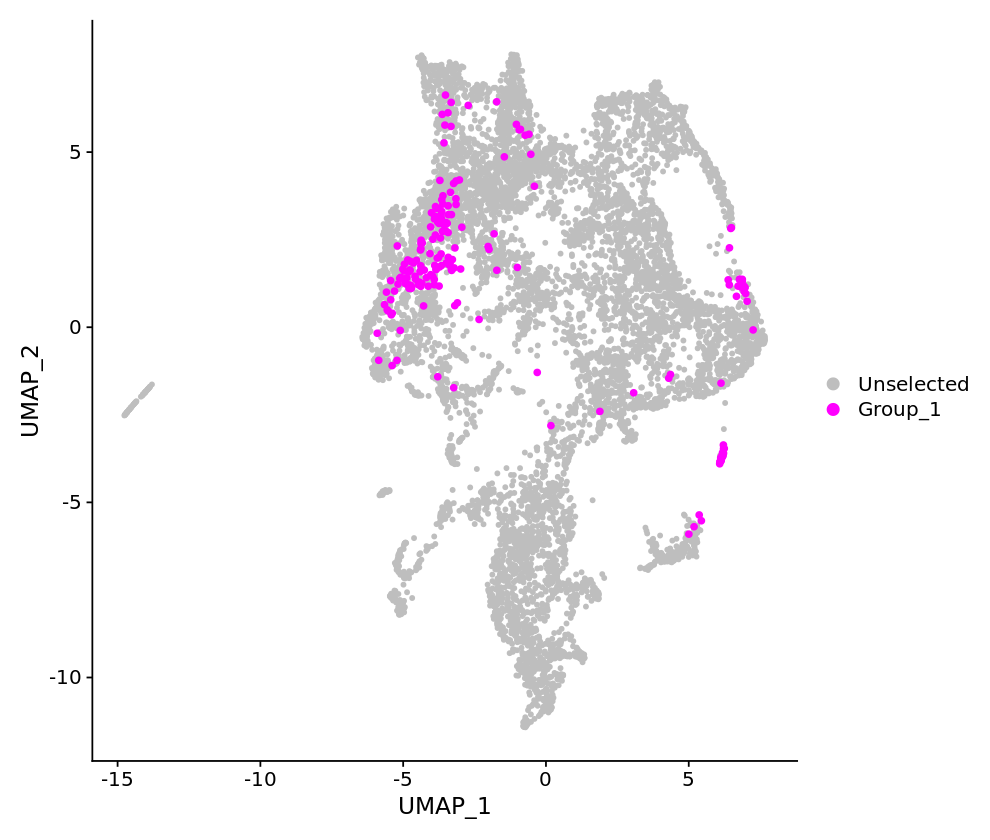

In [133]:
options(repr.plot.width = 8.25, repr.plot.height = 7)
DimPlot(object = Pet_Zhou_IT_allgenes, reduction = "umap", pt.size = 1, 
        #group.by = "finalClustersIT", 
        cells.highlight=TSCs_PRC2i, cols.highlight = "magenta", cols= "grey", sizes.highlight = 1.5)
       #label = FALSE,
        #label.size = 6,  label.color = "black")

In [158]:
pdf(file="/lustre1/project/stg_00041/Irene/10X_NAIVE_TSC_2021/Integration_plots/New_anno_integration_plots/TSC_PRC2i.pdf", height = 7, width = 8.25)
options(repr.plot.width = 8.25, repr.plot.height = 7)
DimPlot(object = Pet_Zhou_IT_allgenes, reduction = "umap", pt.size = 1, 
        #group.by = "finalClustersIT", 
        cells.highlight=TSCs_PRC2i, cols.highlight = "magenta", cols= "grey", sizes.highlight = 1.5)
       #label = FALSE,
        #label.size = 6,  label.color = "black")
dev.off()

png 
  2

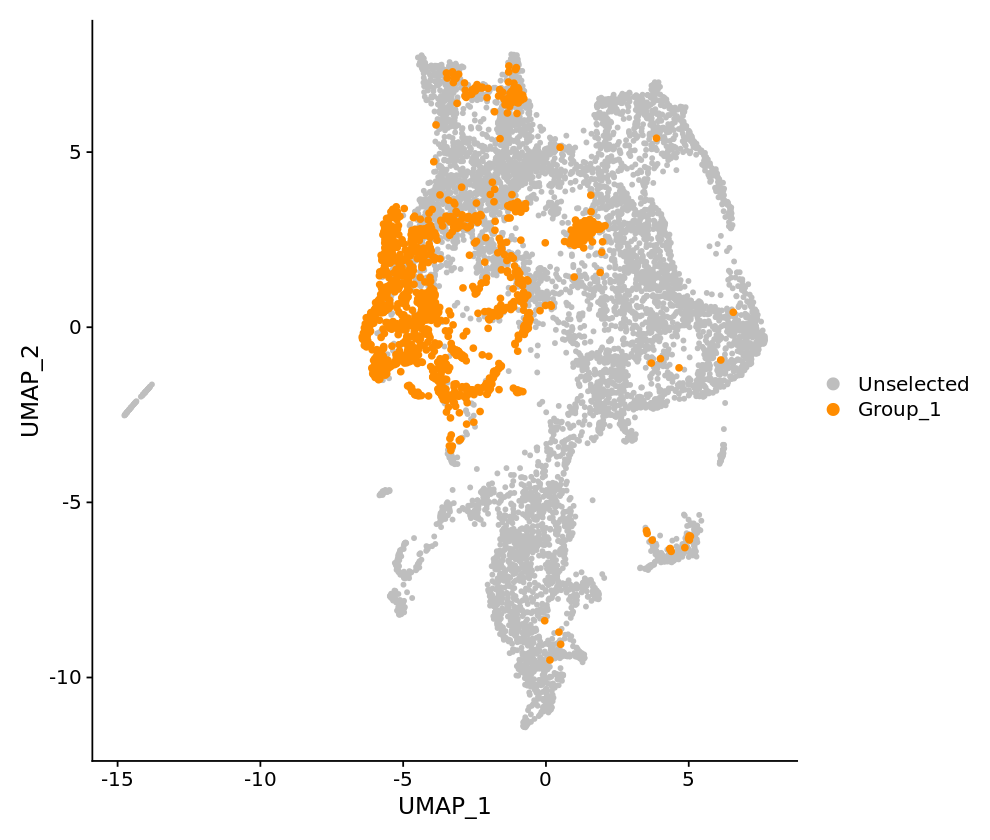

In [145]:
options(repr.plot.width = 8.25, repr.plot.height = 7)
DimPlot(object = Pet_Zhou_IT_allgenes, reduction = "umap", pt.size = 1, 
        #group.by = "finalClustersIT", 
        cells.highlight=Embryo.TE, cols.highlight = "darkorange", cols= "grey", sizes.highlight = 1.5)
       #label = FALSE,
        #label.size = 6,  label.color = "black")

In [156]:
pdf(file="/lustre1/project/stg_00041/Irene/10X_NAIVE_TSC_2021/Integration_plots/New_anno_integration_plots/Embryo_TE.pdf", height = 7, width = 8.25)
DimPlot(object = Pet_Zhou_IT_allgenes, reduction = "umap", pt.size = 1, 
        #group.by = "finalClustersIT", 
        cells.highlight=Embryo.TE, cols.highlight = "darkorange", cols= "grey", sizes.highlight = 1.5)
       #label = FALSE,
        #label.size = 6,  label.color = "black")
dev.off()

png 
  2

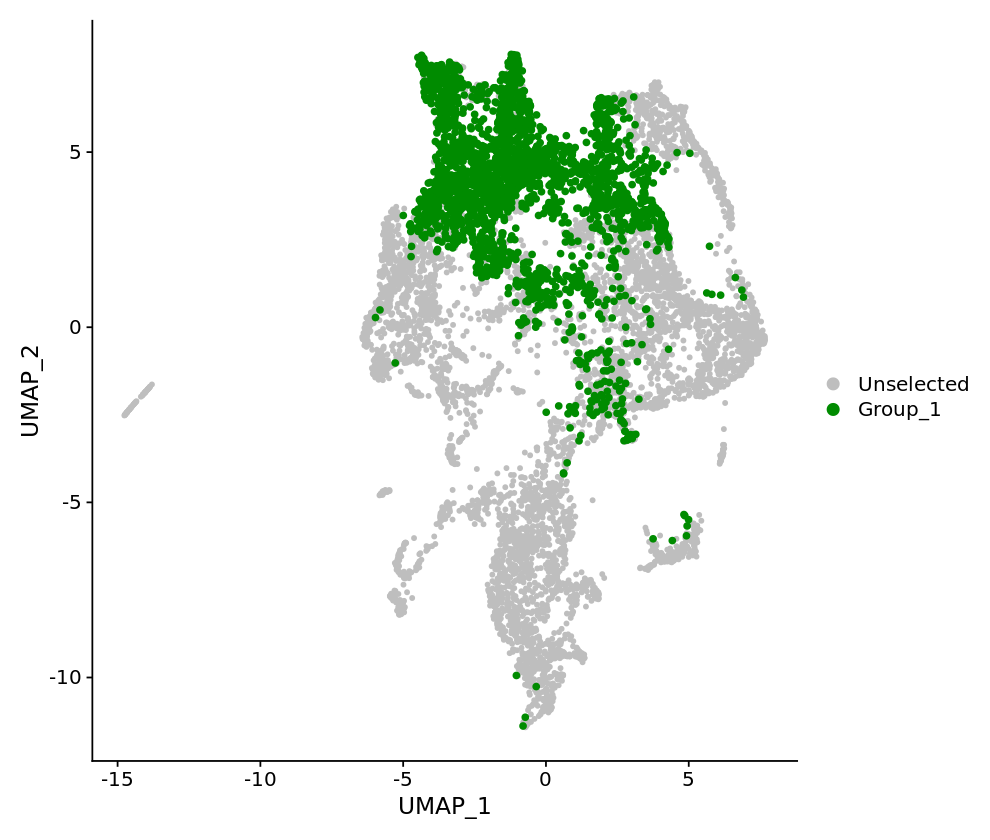

In [149]:
options(repr.plot.width = 8.25, repr.plot.height = 7)
DimPlot(object = Pet_Zhou_IT_allgenes, reduction = "umap", pt.size = 1, 
        #group.by = "finalClustersIT", 
        cells.highlight=Embryo_Trophoblast, cols.highlight = "green4", cols= "grey", sizes.highlight = 1.5)
       #label = FALSE,
        #label.size = 6,  label.color = "black")

In [157]:
pdf(file="/lustre1/project/stg_00041/Irene/10X_NAIVE_TSC_2021/Integration_plots/New_anno_integration_plots/Embryo_Trophoblast.pdf", height = 7, width = 8.25)
DimPlot(object = Pet_Zhou_IT_allgenes, reduction = "umap", pt.size = 1, 
        #group.by = "finalClustersIT", 
        cells.highlight=Embryo_Trophoblast, cols.highlight = "green4", cols= "grey", sizes.highlight = 1.5)
       #label = FALSE,
        #label.size = 6,  label.color = "black")
dev.off()

png 
  2

Show gene expression of some selected genes for Extended Data Fig. 6

In [35]:
DefaultAssay(Pet_Zhou_IT_allgenes) <- "RNA"

null device 
          1

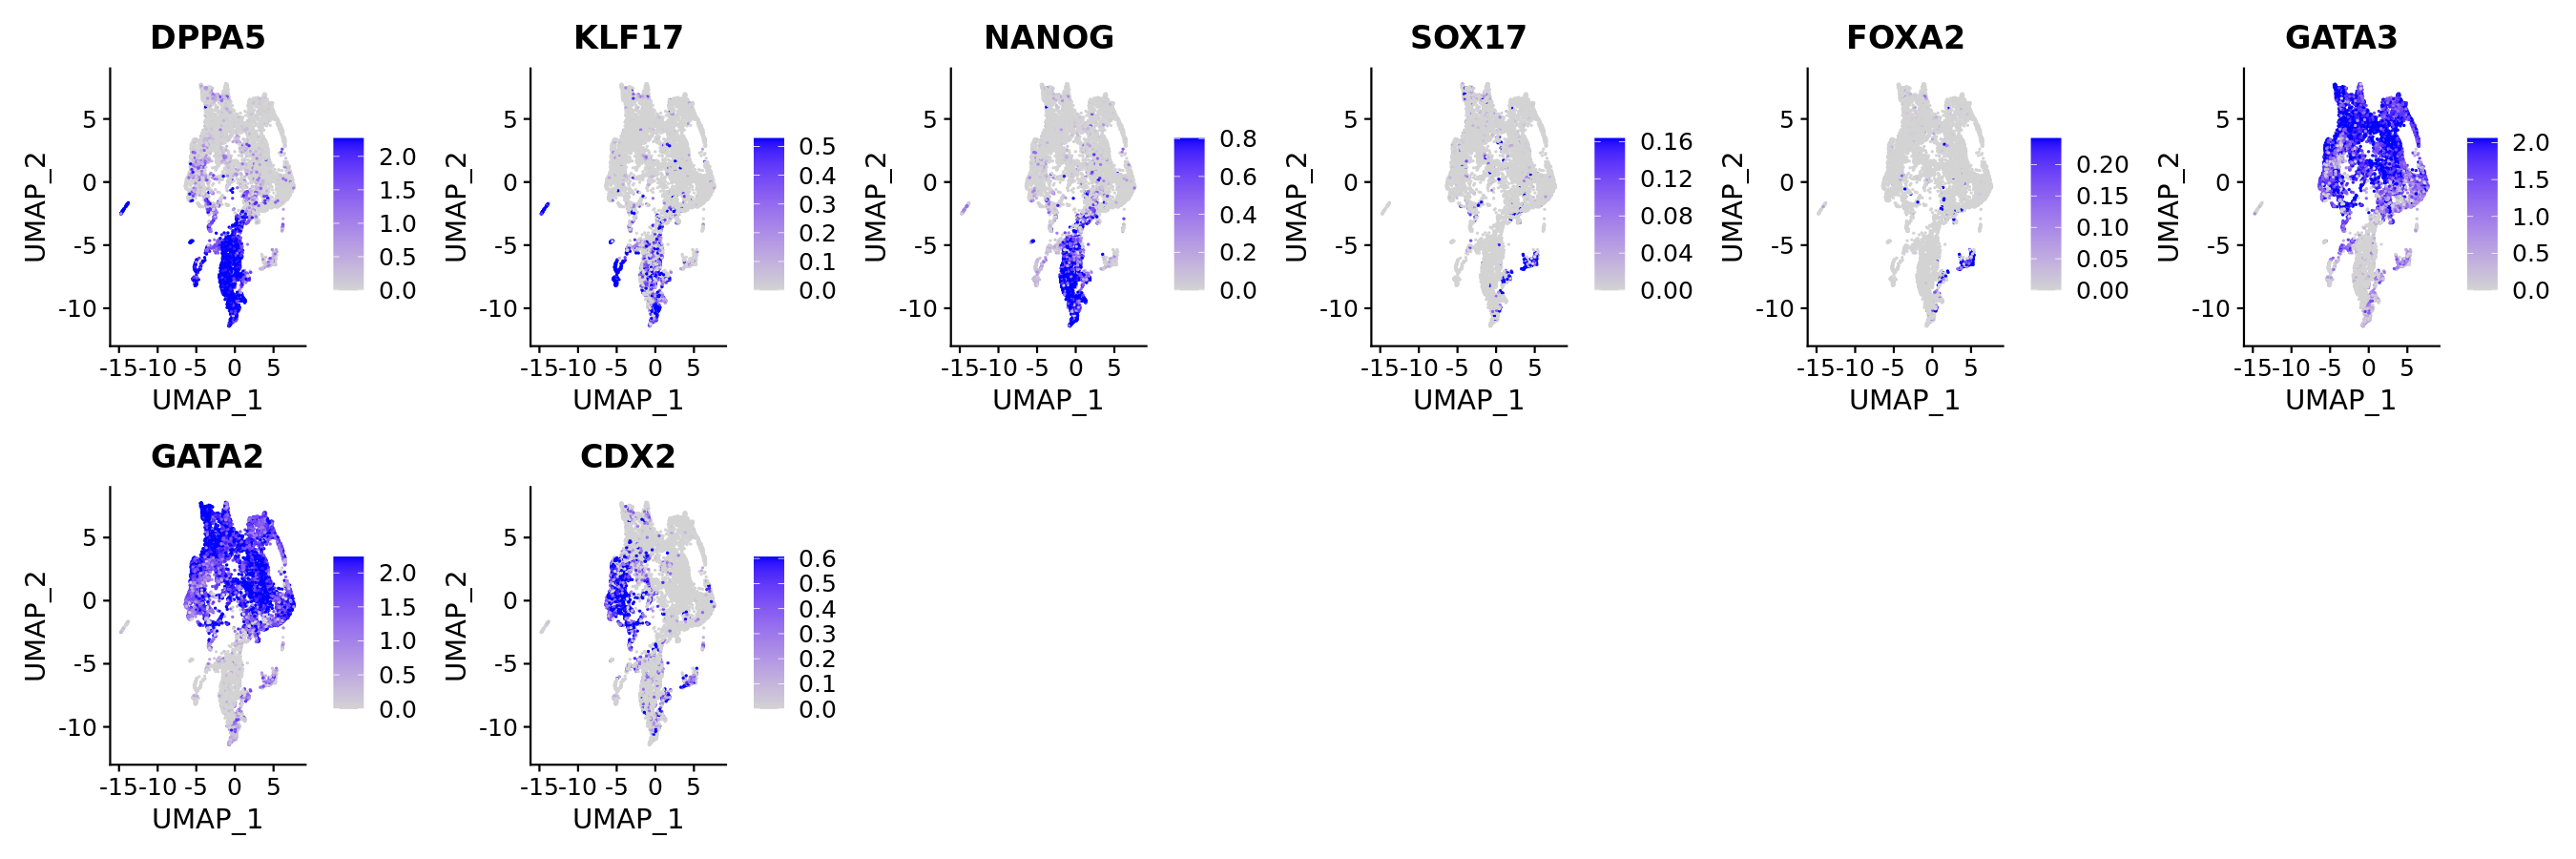

In [36]:
options(repr.plot.width = 18, repr.plot.height = 6, repr.plot.res = 150)
FeaturePlot(
  object = Pet_Zhou_IT_allgenes,
  features = c("DPPA5", "KLF17", "NANOG", #EPI
               "SOX17", "FOXA2", #PE
               "GATA3", "GATA2", "CDX2"), #TROPHOBLAST
             min.cutoff = 0, 
            
  pt.size = 0.1,
  max.cutoff = 'q70',
  ncol = 6
)
dev.off()

In [ ]:
pdf(file="/lustre1/project/stg_00041/Irene/10X_NAIVE_TSC_2021/Integration_plots/New_anno_integration_plots/UMAPembryo_markers2.pdf", height = 6, width = 18)
options(repr.plot.width = 18, repr.plot.height = 6, repr.plot.res = 150)
FeaturePlot(
  object = Pet_Zhou_IT_allgenes,
  features = c("DPPA5", "KLF17", "NANOG", #EPI
               "SOX17", "FOXA2", #PE
               "GATA3", "GATA2", "CDX2"), #TROPHOBLAST
             min.cutoff = 0, 
            
  pt.size = 0.1,
  max.cutoff = 'q70',
  ncol = 6
)
dev.off()